This notebook aims at **testing the two-layer Arctic hypothesis**. We expected the surface current in the main Arctic (Canada Basin + Makarov Basin) goes in cyclonic way and anti-cyclonic in deeper layer.

Therefore, this notebook plots the surface layer and the salinity maximum layer to see whether the hypothesis is right or not. 

**Conclusion: The surface current is not going in a cyclonic way. Have to say this hypothesis is not right at the first place..:(. But the good news is that the simulated flow is very closed to the geostrophic pattern, which means 'geostrophic flow' might be the answer to our original question - why the flow goes in an anti-cyclonic way.**

In [1]:
import copy,os,glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from ArcticTools import hovmoller as hov
from ArcticTools import geostropic as geo
% matplotlib inline

In [2]:
import seaborn as sn
import seawater as sw

import warnings
warnings.filterwarnings('ignore')

In [3]:
import importlib
importlib.reload(hov)

<module 'ArcticTools.hovmoller' from '/ocean/xiaoxiny/research/tools/ArcticTools/hovmoller.py'>

In [4]:
with nc.Dataset(sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/para60Run/result/ENG319582008.nc'))[0]) \
as ptrc:
    nav_lon = ptrc.variables['nav_lon'][:,:]
    nav_lat = ptrc.variables['nav_lat'][:,:]
    dep  =  ptrc.variables['deptht'][:]


tmask = nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
mbathy = tmask.variables['mbathy'][0,400:,:]
tmask = tmask.variables['tmask'][0,:,400:,:]


bathy = nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = bathy.variables['Bathymetry'][400:,:]

In [5]:
uvel = nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridU_19692008.nc')
vvel = nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_eng3/ANHA4-ENG3_gridV_19692008.nc')

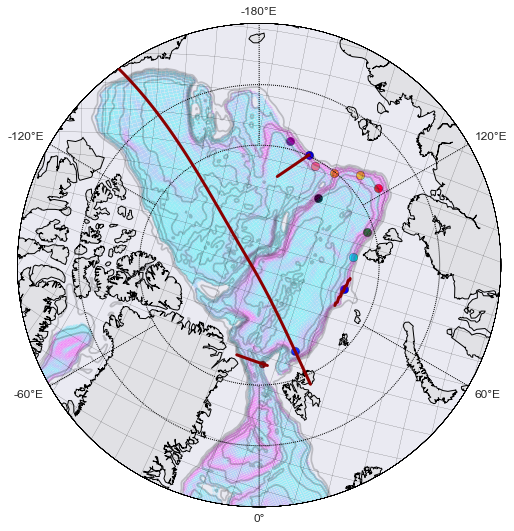

In [6]:
# test functions above
fig  =  plt.figure(figsize = (13/1.5,13/1.5))
ax  =  fig.add_subplot()
m,x_lon,y_lat = hov.mapping(70)


# extra points
x_mb1,y_mb1,a_mb1,b_mb1 = hov.section(x0 = -105,y0 = 303,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_mb1[0],b_mb1[0], s=70,c='purple')

x_nb0,y_nb0,a_nb0,b_nb0 = hov.section(x0 = -170,y0 = 370,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb0[0],b_nb0[0], s=70, c='cyan')

x_nb1,y_nb1,a_nb1,b_nb1 = hov.section(x0 = -150,y0 = 375,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb1[0],b_nb1[0], s=70, c='green')

x_nb2,y_nb2,a_nb2,b_nb2 = hov.section(x0 = -120,y0 = 373,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb2[0],b_nb2[0], s=70,c='r')

x_nb3,y_nb3,a_nb3,b_nb3 = hov.section(x0 = -115,y0 = 358,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb3[0],b_nb3[0], s=70,c='gold')

x_nb4,y_nb4,a_nb4,b_nb4 = hov.section(x0 = -118,y0 = 340,length = 1,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_nb4[0],b_nb4[0], s=70,c='orange')

x_mb2,y_mb2,a_mb2,b_mb2 = hov.section(x0 = -117,y0 = 325,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_mb2[0],b_mb2[0], s=70,c='salmon')

x_lr,y_lr,a_lr,b_lr = hov.section(x0 = -137,y0 = 333,length = 1,xi = 1,yi = -1, x_lon=x_lon, y_lat=y_lat)
m.scatter(a_lr[0],b_lr[0], s=70,c='k')



#sec1 Makarov
x_mb,y_mb,a_mb,b_mb = hov.section(x0 = -130,y0 = 300,length = 20,xi = 1,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_mb[:],b_mb[:],color = 'darkred',linewidth = 3)
#m.scatter(a_mb[15],b_mb[15],color = 'darkred',linewidth = 3)
m.scatter(a_mb[-1],b_mb[-1], s=70)

#sec2 Nansen
x_ns,y_ns,a_ns,b_ns = hov.section(x0 = -210,y0 = 368,length = 25,xi = 1,yi = 0.2, x_lon=x_lon, y_lat=y_lat)
m.plot(a_ns[:],b_ns[:],color = 'darkred',linewidth = 3)
m.scatter(a_ns[-10],b_ns[-10], s=70)
#m.scatter(a_ns[15],b_ns[15],color = 'darkred',linewidth = 3)


#sec3 CB
x_cb,y_cb,a_cb,b_cb = hov.section(x0 = 330,y0 = 170,length = 100,xi = -2,yi = 2, x_lon=x_lon, y_lat=y_lat)
m.plot(a_cb[:],b_cb[:],color = 'darkred',linewidth = 3)
m.scatter(a_cb[-10],b_cb[-10], s=70)


#sec4 Fram strait 
x_fs,y_fs,a_fs,b_fs = hov.section(x0 = -265,y0 = 310,length =25 ,xi = 0 ,yi = 1, x_lon=x_lon, y_lat=y_lat)
m.plot(a_fs[:],b_fs[:],color = 'darkred',linewidth = 3)
m.scatter(a_fs[-5],b_fs[-5],color = 'darkred',linewidth = 3)

# plot one velocity snapshot, make sure my profile is not far away from the pathway
data  = (uvel.variables['vozocrtx'][5,35,400:,:]**2 + vvel.variables['vomecrty'][5,35,400:,:]**2)**0.5
m.pcolor(x_lon,y_lat,data[:,:],cmap = 'cool',vmax = 0.04, alpha = 0.1)

In [7]:
def section_hovmoller(indexa,indexb,data,layer,tmask, nav_lon):
    '''load data for vertical profiles, return to tracer/cooridination 
     ================================================================
     
    arg:  data: 4-dimension model result from NEMO model 
    type: data: np.array
    
    arg:  layer: for a desired depth of the field
    type: layer: interger
    
    arg:  length: length of the section  (Longer the section, bigger this number)
    type: length: interger   
    
    arg:  x0, y0: the starting point of the section.  
    type: x0, y0: interger

    arg:  xi, yi: slope  example: xi  =  0.5 then x0 + 0.5 * i
    type: xi, yi: floats/interger 
                 (If choose floats, index could be floats as well but it will Round to nearest integer)

    '''
    temp = np.zeros((data.shape[0],layer, len(indexa)))
    for i in range (layer):
        temp[:,i,...] = data[:,i,indexa,indexb]
        for k in range (data.shape[0]):
            temp[k,i,...][tmask[i,indexa,indexb] == 0] = np.nan

    coordinate = nav_lon[indexa,indexb]
    return temp,coordinate


def load_v(vel_comp,T, tmask, ENG, key ):
    '''
    This function is designed to obtain velocity field
    ======================================================
    '''
    vels ={'U':'vozocrtx','V':'vomecrty','W':'vovecrtz'}

    with nc.Dataset(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*%s.nc'%(ENG,vel_comp,T))[0])\
as temp:
        data  = temp.variables[vels[vel_comp]][0,:,400:,:]
        data [tmask == 0] = np.nan
    return data

In [8]:
# assign t-maximum layer to one array
temp= hov.load_ts('T',T=2002,tmask= tmask, ENG='exh005', key = '_t_')
layer= np.zeros_like(nav_lon)
depth=np.zeros_like(nav_lon)
for i in range (layer.shape[0]):
    for j in range (layer.shape[1]):
        layer[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
        depth[i,j] = dep[layer[i,j]]

depth [tmask [30,:,:]==0] = np.nan

temp= hov.load_ts('T',T=2014,tmask= tmask, ENG='exh005', key = '_t_')
layer2014= np.zeros_like(nav_lon)
depth2014=np.zeros_like(nav_lon)
for i in range (layer2014.shape[0]):
    for j in range (layer2014.shape[1]):
        layer2014[i,j] = np.ma.masked_invalid(temp[:45,i,j]).argmax()
        depth2014[i,j] = dep[layer2014[i,j]]

depth2014 [tmask [30,:,:]==0] = np.nan

##### Visualize temp. maximum layer in 2002 and 2013

* depth plot

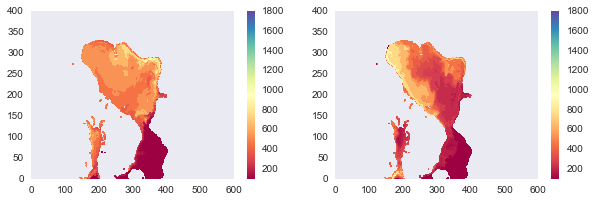

In [9]:
# visualize t-maximum layer
fig=plt.figure(figsize=(10,3))
plt.subplot(121)
plt.pcolor(np.ma.masked_invalid(depth), cmap='Spectral',vmin=100,vmax=1800)
plt.colorbar()
plt.subplot(122)
plt.pcolor(np.ma.masked_invalid(depth2014), cmap='Spectral',vmin=100,vmax=1800)
plt.colorbar()

* layer plot

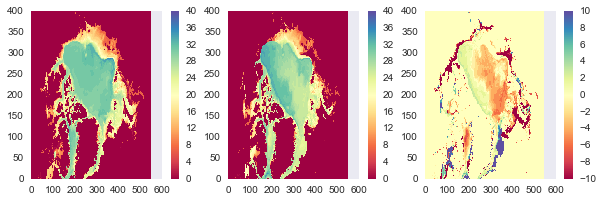

In [10]:
# visualize t-maximum layer
fig=plt.figure(figsize=(10,3))
plt.subplot(131)
plt.pcolor(layer, cmap='Spectral',vmin=0,vmax=40)
plt.colorbar()
plt.subplot(132)
plt.pcolor(layer2014, cmap='Spectral',vmin=0,vmax=40)
plt.colorbar()
plt.subplot(133)
plt.pcolor(layer2014-layer, cmap='Spectral',vmin=-10,vmax=10)
plt.colorbar()

# s & T at the scatter point

In [11]:
# preprae data -- t
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= hov.load_ts('T',T=i+2002,tmask= tmask, ENG='exh005', key = '_t_')
    Temp[i,...]=data
    
temp,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


# preprae data -- s
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= hov.load_ts('S',T=i+2002,tmask= tmask, ENG='exh005', key = '_s_')
    Temp[i,...]=data
salinity,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


# preprae data -- u
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= load_v('U',T=i+2002,tmask= tmask, ENG='EXH005', key = 'U')
    Temp[i,...]=data
    
u,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)

# preprae data -- v
Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
for i in range (2014-2002):
    data= load_v('V',T=i+2002,tmask= tmask, ENG='EXH005', key = 'V')
    Temp[i,...]=data
v,coor = section_hovmoller(indexa=x_mb,indexb=y_mb,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)



Take a  look at the vertical profile at the scatter point: (quick test on the function that finds maximum layer)

In [12]:
temp[-1,:50.,-1]

array([-1.77966034, -1.77878332, -1.7785511 , -1.77823305, -1.77774596,
       -1.77716994, -1.77599025, -1.77479935, -1.77238619, -1.76891518,
       -1.75593281, -1.72179186, -1.68986738, -1.6503278 , -1.6190815 ,
       -1.58313549, -1.5171622 , -1.42203021, -1.26834404, -1.11810088,
       -1.01650846, -0.88953632, -0.70840693, -0.46367294, -0.18016952,
        0.07031648,  0.27106306,  0.43677405,  0.54982245,  0.63746566,
        0.70223254,  0.73544484,  0.7321794 ,  0.69083887,  0.58249003,
        0.43664756,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [13]:
np.ma.masked_invalid(temp[i,:50.,-1]).argmax()

31

In [14]:
temp[-1,35,-1]

0.43664756417274475

In [15]:
# preprae data -- t
def ts_profile(x,y,index, key_s_lim= 'False'):
    
    Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
    for i in range (2014-2002):
        data= hov.load_ts('T',T=i+2002,tmask= tmask, ENG='exh005', key = '_t_')
        Temp[i,...]=data

    temp,coor = section_hovmoller(indexa=x,indexb=y,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)


    # preprae data -- s
    Temp = np.zeros((2014-2002,50,nav_lon.shape[0],nav_lon.shape[1]))
    for i in range (2014-2002):
        data= hov.load_ts('S',T=i+2002,tmask= tmask, ENG='exh005', key = '_s_')
        Temp[i,...]=data
    salinity,coor = section_hovmoller(indexa=x,indexb=y,data=Temp,layer=50,tmask=tmask, nav_lon=nav_lon)
    
    temp[salinity ==0 ] = np.nan
    salinity[salinity ==0 ] = np.nan
    
    temp=np.ma.masked_invalid(temp)
    salinity=np.ma.masked_invalid(salinity)

    print ('temp maximum (2013): layer %s, depth %s'%(temp[-1,:50.,index].argmax(),dep[temp[-1,:50.,index].argmax()]))
    print ('salinity maximum (2013): layer %s, depth %s'%(salinity[-1,:50.,index].argmax(),dep[salinity[-1,:50.,index].argmax()]))
    
    fig  =  plt.figure(figsize = (18,9/1.2))
    ax = plt.subplot(3,4,1)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.plot(np.ma.masked_invalid(temp[i,:45.,index]),dep[:45],color=c) #[0,...] means 
    plt.ylim(0,2500)
    plt.gca().invert_yaxis()
    plt.xlabel('temp')

    ax = plt.subplot(3,4,2)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.plot(np.ma.masked_invalid(salinity[i,:45.,index]),dep[:45],color=c)
    plt.ylim(0,2500)
    plt.gca().invert_yaxis()
    plt.xlabel('salinity')
    
    ax = plt.subplot(3,4,3)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        t = sw.library.T90conv(temp[i,:50.,index])
        rho = sw.dens0(salinity[i,:50.,index], t)
        plt.plot(np.ma.masked_invalid(rho),dep[:50],label=i+2002,color=c)
    plt.ylim(0,2500)
    plt.xlim(1027.5,1028.5)
    plt.gca().invert_yaxis()
    plt.xlabel('density')
    plt.legend(loc=0)
    
    
    ax = plt.subplot(3,4,4)
    for i,c in zip([0,5,10],[sn.color_palette('deep')[0],sn.color_palette('deep')[1],sn.color_palette('deep')[2]]):
        plt.scatter(np.ma.masked_invalid(salinity[i,:45.,index]),np.ma.masked_invalid(temp[i,:45.,index])\
                    ,color=c,label=i+2002)
    if key_s_lim == 'True':
        plt.xlim(28,36)
    plt.xlabel('s')
    plt.ylabel('t')
    plt.legend(loc=2)
    plt.show()

# Fram strait

temp maximum (2013): layer 26, depth 222.475
salinity maximum (2013): layer 28, depth 318.127


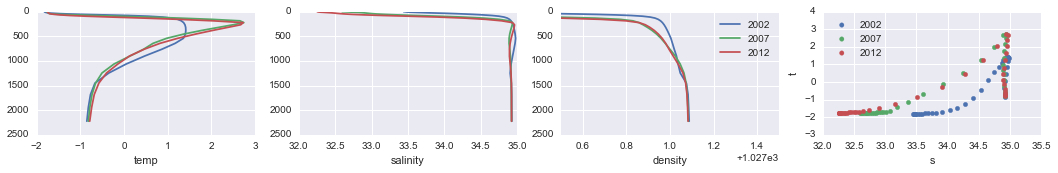

In [16]:
ts_profile(x=x_fs,y=y_fs,index=-5)

# close to Fram strait

temp maximum (2013): layer 26, depth 222.475
salinity maximum (2013): layer 28, depth 318.127


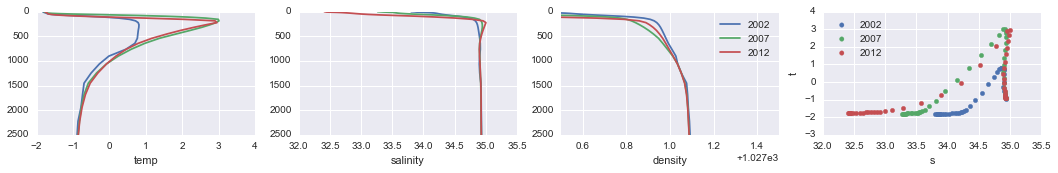

In [17]:
ts_profile(x=x_cb,y=y_cb,index=-10)

* Note that the density profile is ver similar with salinity profiles before I zoomed in. However, in order to take a closer look at depth, I zoomed in the density profile by limiting x lim **from 1027 to 1028.5**. 

# Eurasian Basin 

** (ANNA ->cyan -> Green -> red -> gold -> orange points-> enter MB/LomosovR) **

> On the pathway1 (ANHA --> cyan --> Green ), the temp. max. layer **was pushed down** from 900m to 1600m (due to the loss of buoyancy?). And then the layer **was lifted again**.

> ** Observations provided critical information about the evolution of an unprecedentedly strong AW warm pulse from its entrance into the eastern Arctic Ocean as it decays along its path into the Eurasian Basin interior. (suggests that some other, non-advective forces modulate temperature there)**

> EXH005: for deeper layer, less warmer along the pathway; for upper layer, less cooler along the pathway

temp maximum (2013): layer 26, depth 222.475
salinity maximum (2013): layer 28, depth 318.127


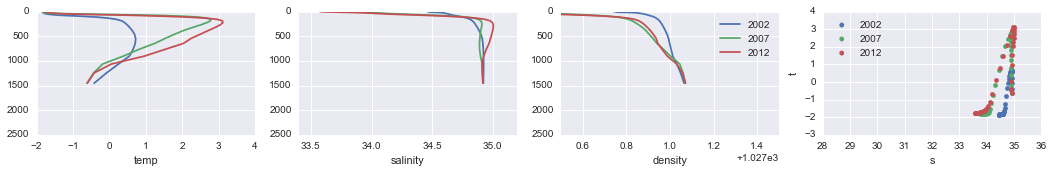

temp maximum (2013): layer 28, depth 318.127
salinity maximum (2013): layer 40, depth 2225.08


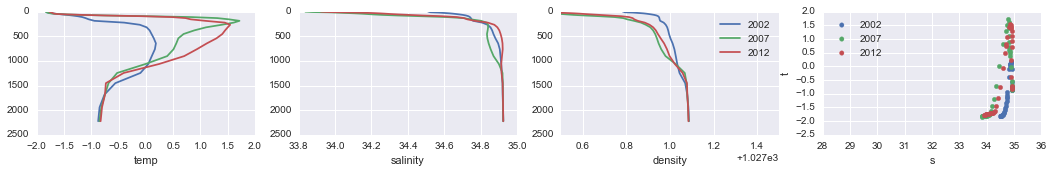

temp maximum (2013): layer 29, depth 380.213
salinity maximum (2013): layer 41, depth 2533.34


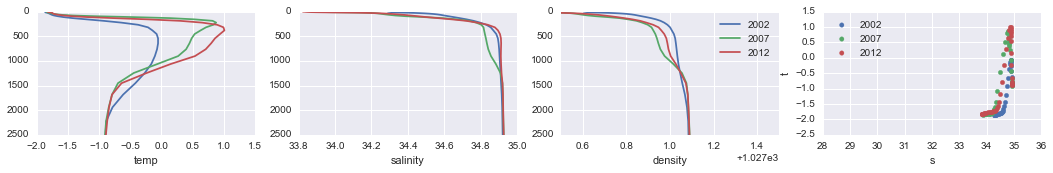

temp maximum (2013): layer 29, depth 380.213
salinity maximum (2013): layer 40, depth 2225.08


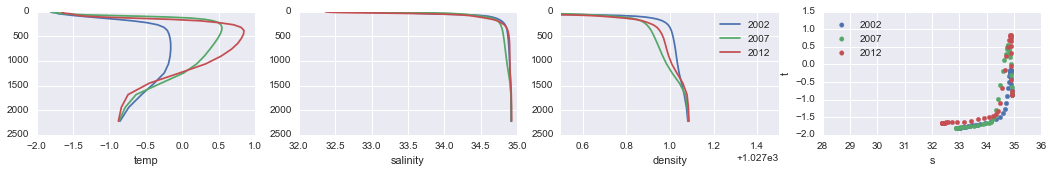

temp maximum (2013): layer 30, depth 453.938
salinity maximum (2013): layer 41, depth 2533.34


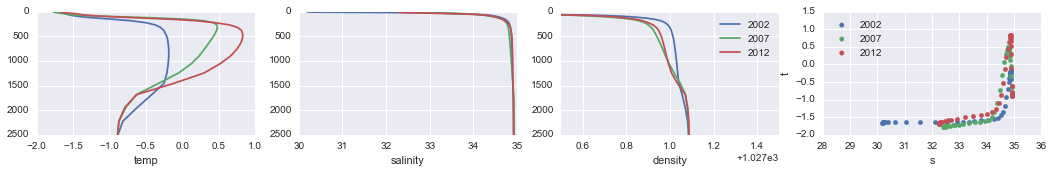

temp maximum (2013): layer 31, depth 541.089
salinity maximum (2013): layer 39, depth 1941.89


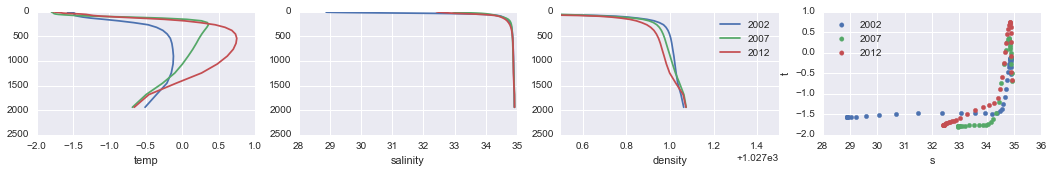

In [18]:
ts_profile(x=x_ns,y=y_ns,index=-15,key_s_lim= 'True')
ts_profile(x=x_nb0,y=y_nb0,index=0,key_s_lim= 'True')
ts_profile(x=x_nb1,y=y_nb1,index=0,key_s_lim= 'True')
ts_profile(x=x_nb2,y=y_nb2,index=0,key_s_lim= 'True')
ts_profile(x=x_nb3,y=y_nb3,index=0,key_s_lim= 'True')
ts_profile(x=x_nb4,y=y_nb4,index=0,key_s_lim= 'True')

# Lomonsov Ridge

(black dot)

The profile at the black dot is similar with the orange point (the place where Altantic inflow developed into two arms.) The temp maximum layer is 1245.29, which is at the same depth as the temp. max. at MB.

temp maximum (2013): layer 30, depth 453.938
salinity maximum (2013): layer 41, depth 2533.34


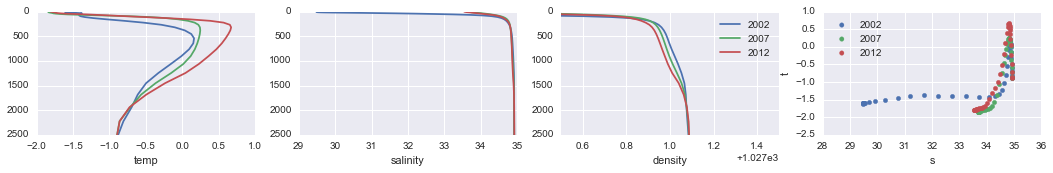

In [19]:
ts_profile(x=x_lr,y=y_lr,index=0, key_s_lim= 'True')

# MB 

(pink -> blue -> purple)

Comparing with profiles on Lomonsov R, this place might have another cooler water mass coming at about 600m.

temp maximum (2013): layer 30, depth 453.938
salinity maximum (2013): layer 39, depth 1941.89


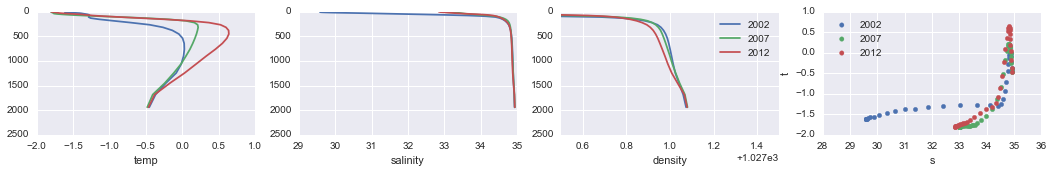

temp maximum (2013): layer 31, depth 541.089
salinity maximum (2013): layer 39, depth 1941.89


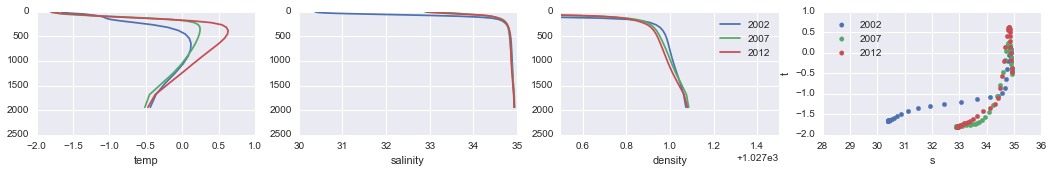

temp maximum (2013): layer 28, depth 318.127
salinity maximum (2013): layer 39, depth 1941.89


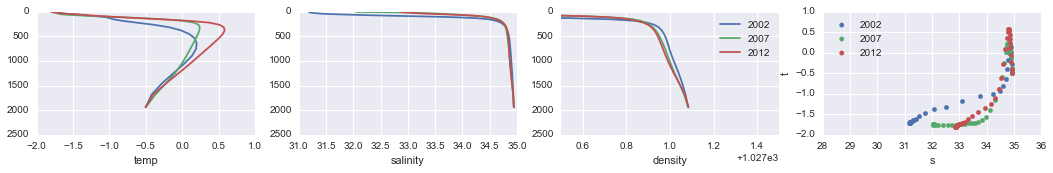

In [20]:
ts_profile(x=x_mb2,y=y_mb2,index=0, key_s_lim= 'True')
ts_profile(x=x_mb,y=y_mb,index=-3, key_s_lim= 'True')
ts_profile(x=x_mb1,y=y_mb1,index=0, key_s_lim= 'True')

In [21]:
# grid for plotting
x1d=np.linspace(0,nav_lon[:,0].shape[0],nav_lat[:,0].shape[0])
y1d=np.linspace(0,nav_lon[0,:].shape[0],nav_lat[0,:].shape[0])
x2d,y2d=np.meshgrid(y1d,x1d)

lhs : 2002;  rhs:2014

# cyclonic year (2002) & anti-cyclonic(2014)  -- salinity maximum layer


> green arrows are goestrophic flow/ black arrows are flows from model. (They have the same scale.)


# Sal.

Trying to see what the u and v look like in temp maiximum layer

In [32]:
def load_smax(year,layer):

    # assign array

    ug_0 = np.zeros_like(tmask)
    vg_0 = np.zeros_like(tmask)
    P_0 = np.zeros_like(tmask)

    # loop over the depth dimension to get full-dimension geostrophic flow
    print ('>> loading geostrophic flow')
    for i in range (1,tmask.shape[0]):
        ug_0[i,:,:],vg_0[i,:,:],P_0[i,:,:],nav_lat,nav_lon = geo.geoflow(\
            modelt=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh005/ANHA4-EXH005_gridT_t_year%s.nc'%year),
            models=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh005/ANHA4-EXH005_gridT_s_year%s.nc'%year),
            modelssh=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh005/ANHA4-EXH005_gridT_ssh_year%s.nc'%year),
            layer=i,ssh_key = 'True',detail = 'False')

    # load u, v, t, s
    print ('>> loading u, v, t, s')
    u= load_v('U',T=year,tmask= tmask, ENG='EXH005', key = 'U')
    v= load_v('V',T=year,tmask= tmask, ENG='EXH005', key = 'V')
    t= hov.load_ts('T',T=year,tmask= tmask, ENG='exh005', key = '_t_')
    s= hov.load_ts('S',T=year,tmask= tmask, ENG='exh005', key = '_s_')

    # set up a dictionary to contain all the model result
    model={'u':u,'v':v,'ug_0':ug_0,'vg_0':vg_0,\
           't':t,'s':s}
    
    # set up an empty dictionary for latter use     
    s_max={'u':np.zeros_like(nav_lon),'v':np.zeros_like(nav_lon),\
           'ug_0':np.zeros_like(nav_lon),'vg_0':np.zeros_like(nav_lon),\
           't':np.zeros_like(nav_lon),'s':np.zeros_like(nav_lon)}


    # select data from each local s max layer
    for i in range (layer.shape[0]):
        for j in range (layer.shape[1]):
            if layer[i,j] != 0:
                for ikey in s_max.keys():
                    s_max[ikey][i,j] = model[ikey][layer[i,j],i,j]

    # mask land
    for i in s_max.keys():
        s_max[i][s_max['s'] ==0 ] = np.nan
        s_max[i]=np.ma.masked_invalid(s_max[i])
    return s_max

In [33]:
# load data for 2002 and 2014
s_max_data= {'s_max_2002':load_smax(2002,layer=layer),'s_max_2014':load_smax(2014,layer=layer2014)}

>> loading geostrophic flow
>> loading u, v, t, s
>> loading geostrophic flow
>> loading u, v, t, s


Plot temp. maximum layer with modeled velocity
year :2002


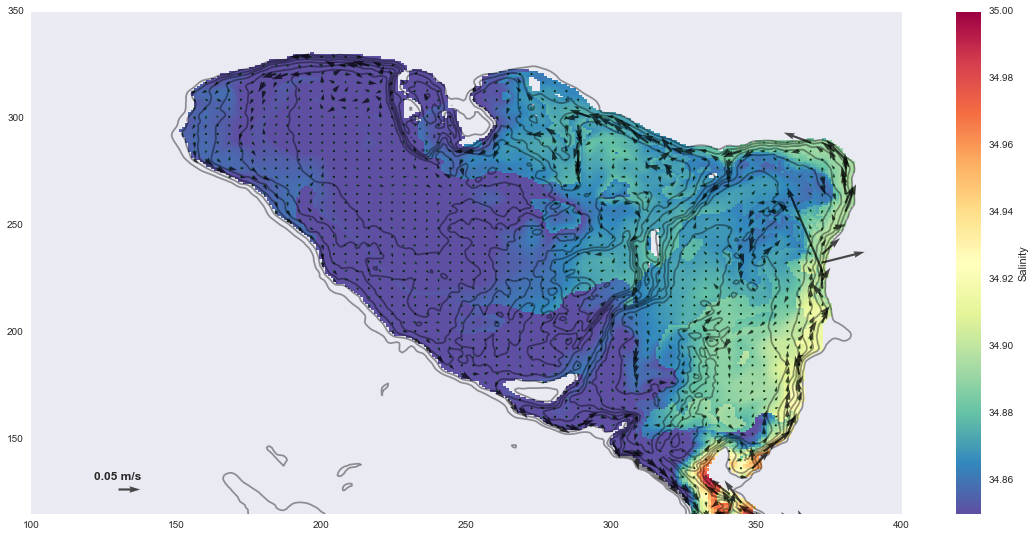

year :2014


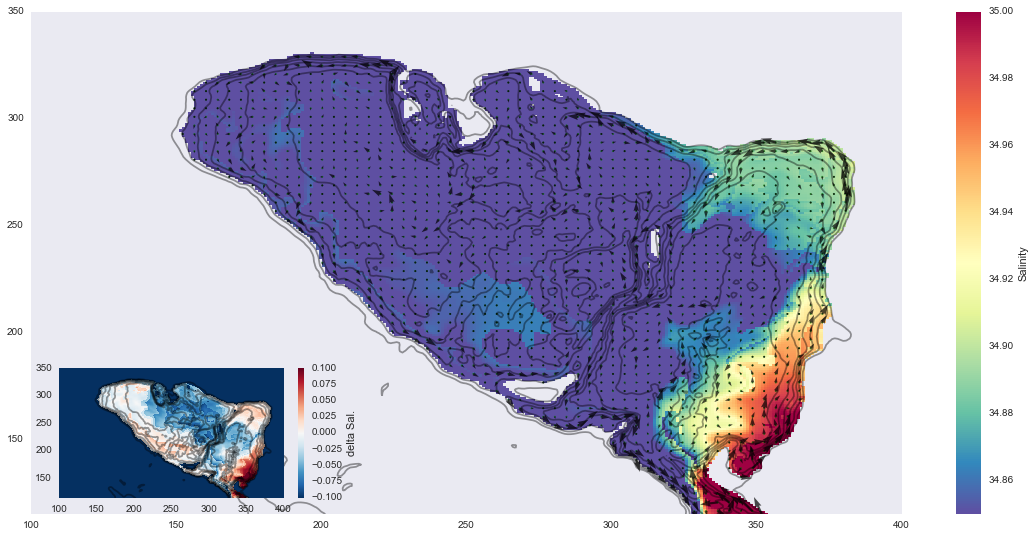

In [34]:
print ('Plot temp. maximum layer with modeled velocity')


for year,s_max, vmin,vmax,scale in zip ([2002,2014],[s_max_data['s_max_2002'],s_max_data['s_max_2014']],\
                                  [34.85,34.85],[35,35],[2,3.5]):
    print ("year :%s"%year)
    fig = plt.figure(figsize=(13*1.5,6*1.5))
    for i in s_max.keys():
        s_max[i][tmask[35,:,:]==0]=np.nan
    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(s_max['s']),cmap='Spectral_r',
               vmin=vmin,vmax=vmax)
                #vmin=np.ma.masked_invalid(P_0[:,:]).min()+3800, vmax=np.ma.masked_invalid(P_0[:,:]).max()-100);
    cbar=plt.colorbar()
    cbar.set_label('Salinity')
    #vector

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(s_max['ug_0'][::4,::4]),\
                 np.ma.masked_invalid(s_max['vg_0'][::4,::4]),
                 scale=scale,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], s_max['u'][::4,::4], s_max['v'][::4,::4],
               scale=scale,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    if year == 2014:
        left, bottom, width, height = [0.145, 0.15, 0.2, 0.2]
        ax = fig.add_axes([left, bottom, width, height])
        im=ax.pcolor(x2d[:,:], y2d[:,:], s_max['s']-s_max_data['s_max_2002']['s'] \
                     ,vmin=-0.1,vmax=0.1,cmap='RdBu_r');
        cbar=fig.colorbar(im, ax=ax)
        cbar.set_label('delta Sal.')
        plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
        plt.ylim(115,350)    ;plt.xlim(100,400)

    plt.show()

The lower left plot shows the maximum salinity difference in the Arctic. 


# Temp. 

In 2014, significantly saltier, and warmer (see plots below) in Nansen Basin and Makarov Basin. Cooler boundary current at Alpha Ridge (see plots below).

year :2002


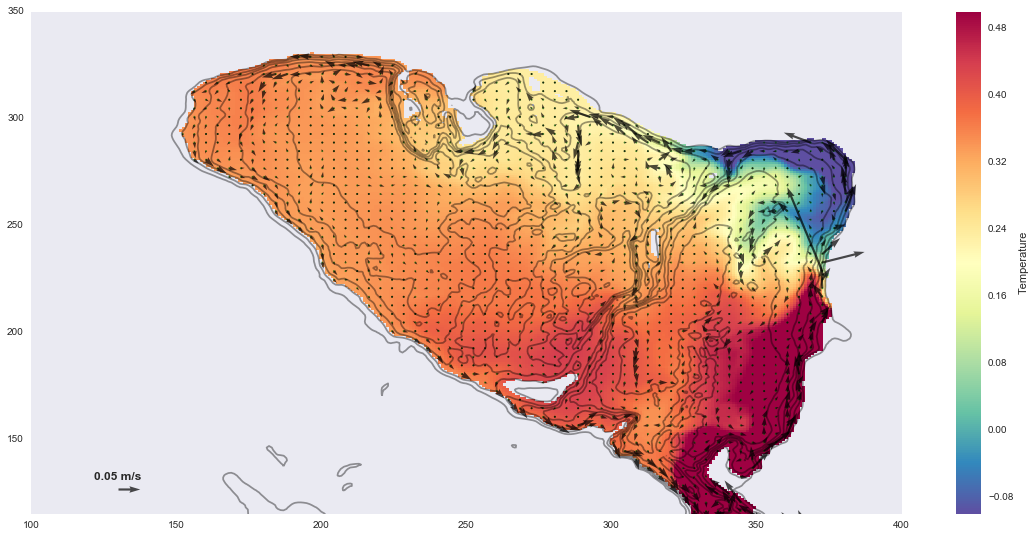

year :2014


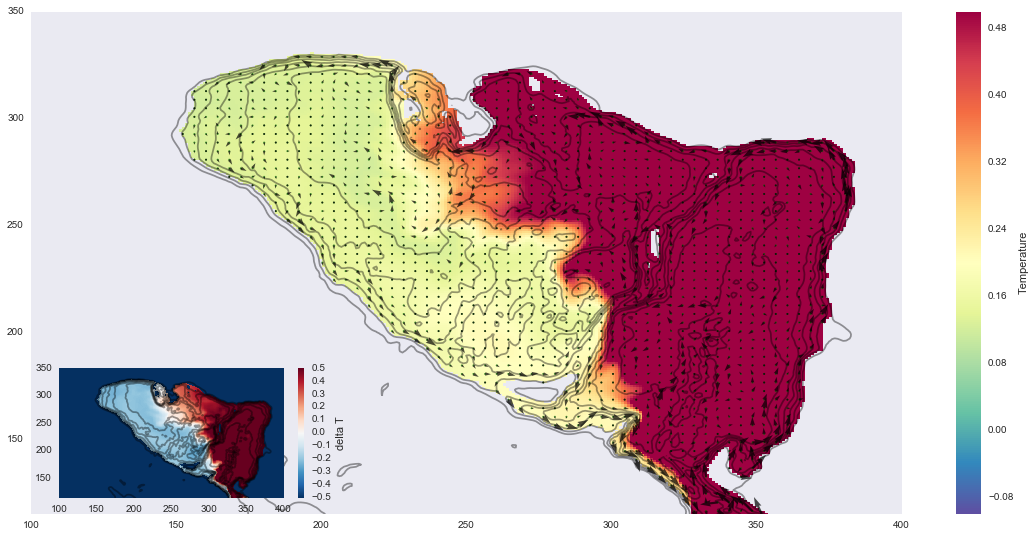

In [35]:
for year,s_max, vmin,vmax,scale in zip ([2002,2014],[s_max_data['s_max_2002'],s_max_data['s_max_2014']],\
                                  [-0.1,-0.1],[0.5,0.5],[2,3.5]):
    print ("year :%s"%year)
    fig = plt.figure(figsize=(13*1.5,6*1.5))    

    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(s_max['t']),cmap='Spectral_r',vmin=vmin,vmax=vmax)
                #vmin=np.ma.masked_invalid(P_0[:,:]).min()+3800, vmax=np.ma.masked_invalid(P_0[:,:]).max()-100);
    cbar=plt.colorbar()
    cbar.set_label('Temperature')
    #vector

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(s_max['ug_0'][::4,::4]),\
                 np.ma.masked_invalid(s_max['vg_0'][::4,::4]),
                 scale=scale,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], s_max['u'][::4,::4], s_max['v'][::4,::4],
               scale=scale,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    if year == 2014:
        left, bottom, width, height = [0.145, 0.15, 0.2, 0.2]
        ax = fig.add_axes([left, bottom, width, height])
        im=ax.pcolor(x2d[:,:], y2d[:,:], s_max['t']-s_max_data['s_max_2002']['t'] \
                     ,vmin=-0.5,vmax=0.5,cmap='RdBu_r');
        cbar=fig.colorbar(im, ax=ax)
        cbar.set_label('delta T')
        plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
        plt.ylim(115,350)    ;plt.xlim(100,400)

    plt.show()

# cyclonic  year / anti-cyclonic year  -- only at layer 34

> green arrows are goestrophic flow/ black arrows are flows from model.

> the background contour plot is the pressure.

In [36]:
print ('Plot surface cool layer with modeled velocity')
layer = salinity[-1,:45.,-15].argmax()

Plot surface cool layer with modeled velocity


Plot salinity maximum layer with modeled velocity
year :2002


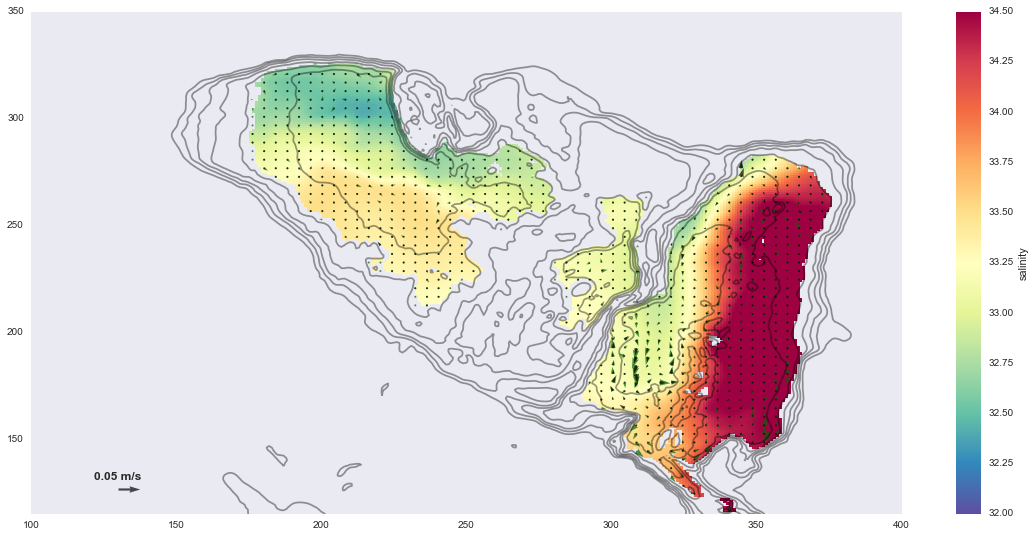

year :2014


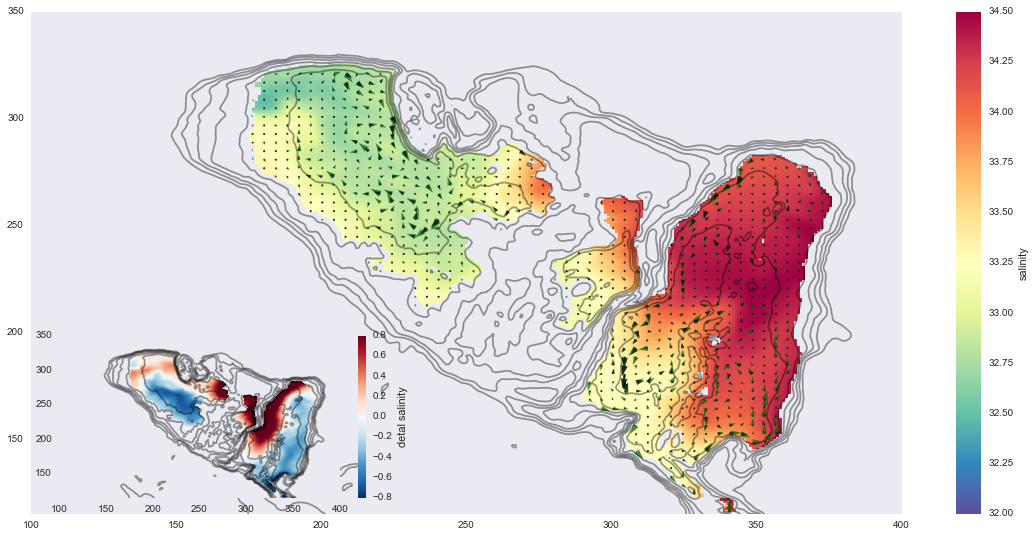

In [37]:


print ('Plot salinity maximum layer with modeled velocity')

T=2002

for year,vmin,vmax in zip ([2002,2014],[8.347e6+1000,8.347e6+1000],[8.347e6+1500,8.347e6+2400]):
    print ("year :%s"%year)
    ug_0,vg_0,P_0,nav_lat,nav_lon = geo.geoflow(\
        modelt=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh005/ANHA4-EXH005_gridT_t_year%s.nc'%year),
        models=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh005/ANHA4-EXH005_gridT_s_year%s.nc'%year),
        modelssh=nc.Dataset('/ocean/xiaoxiny/research/result_jasper/data_exh005/ANHA4-EXH005_gridT_ssh_year%s.nc'%year),
        layer=layer,ssh_key = 'True',detail = 'False')


    fig = plt.figure(figsize=(13*1.5,6*1.5))    
    data= hov.load_ts('S',T=year,tmask= tmask, ENG='exh005', key = '_s_')
    data = np.sum(data[:layer,:,:],axis=0)
    data = np.ma.masked_where(tmask[layer,:,:]==0,data)
    plt.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(data[:,:]/layer),
               vmin=32,vmax=34.5,cmap='Spectral_r');
    
    cbar=plt.colorbar()
    cbar.set_label('salinity')
    #vector
    u= load_v('U',T=year,tmask= tmask, ENG='EXH005', key = 'U')
    v= load_v('V',T=year,tmask= tmask, ENG='EXH005', key = 'V')

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], np.ma.masked_invalid(ug_0[::4,::4]), np.ma.masked_invalid(vg_0[::4,::4]),
               scale=2.,width=0.0025,color='darkgreen',alpha=0.7)

    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], u[layer,::4,::4], v[layer,::4,::4],
               scale=2.,width=0.0025,color='k',alpha=0.7)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s',fontproperties={'weight': 'bold'})

    plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.ylim(115,350)    
    plt.xlim(100,400)

    if year ==2002:
        store_s = data[:,:]/layer
    if year ==2014:
        left, bottom, width, height = [0.145, 0.15, 0.25, 0.25]
        ax = fig.add_axes([left, bottom, width, height])
        im=ax.pcolor(x2d[:,:], y2d[:,:], np.ma.masked_invalid(data[:,:]/layer-store_s),cmap='RdBu_r',
                   vmin=-0.8,vmax=0.8)
        cbar=fig.colorbar(im, ax=ax)
        cbar.set_label('detal salinity')
        plt.ylim(115,350);plt.xlim(100,400)
        plt.contour(bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.show()


looks like temperature is more dominant in density.. (because the salinity seems to have a negative relationship with density but we know this is not true.)

-- refer to the previous version (http://nbviewer.jupyter.org/urls/bitbucket.org/ccar-modeling/analysis-cindy/raw/aa4f3eba015e99af2aa149ff1e6172ab888a68a8/notebooks/phy_field/two-layer_Arctic.ipynb).


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
